In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('data.csv',error_bad_lines=False,warn_bad_lines=False)
df['length']=df['password'].apply(lambda x: len(str(x)))
df['digits'] = df['password'].apply(lambda x: len([str(x) for x in list(str(x)) if str(x).isdigit()]))
df['alphas'] = df['password'].apply(lambda x: len([x for x in list(str(x)) if x.isalpha()]))
vowels = ['a', 'e', 'i', 'o', 'u', 'y']
df['vowels'] = df['password'].apply(lambda x: len([x for x in list(str(x)) if x in vowels]))
df['consonants'] = df['password'].apply(lambda x: len([x for x in list(str(x)) if x not in vowels and x.isalpha()]))
df['spec_symbols']=df['password'].apply(lambda x: len([x for x in list(str(x)) if ((not x.isalpha()) and (not x.isdigit()))]))

In [3]:
df

,password,strength,length,digits,alphas,vowels,consonants,spec_symbols
0,kzde5577,1,8,4,4,1,3,0
1,kino3434,1,8,4,4,2,2,0
2,visi7k1yr,1,9,2,7,3,4,0
3,megzy123,1,8,3,5,2,3,0
4,lamborghin1,1,11,1,10,3,7,0
...,...,...,...,...,...,...,...,...
669635,10redtux10,1,10,4,6,2,4,0
669636,infrared1,1,9,1,8,3,5,0
669637,184520socram,1,12,6,6,2,4,0
669638,marken22a,1,9,2,7,3,4,0


In [4]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix,accuracy_score

In [5]:
x=df.drop('password',axis=1).drop('strength',axis=1)
y=df['strength']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=np.random)

In [7]:
len(X_test)

200892

669640*0,3=200892

[LibSVM]Accuracy = 1.0


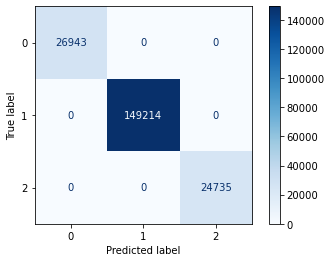

In [8]:
svm1=SVC(kernel='rbf',C=1.0,gamma='scale',coef0=0.0,verbose=True,random_state=np.random.RandomState())
svm1.fit(X_train,y_train)
y_pred=svm1.predict(X_test)
print('Accuracy = {0}'.format(accuracy_score(y_pred,y_test)))
plot_confusion_matrix(svm1,X_test,y_test,cmap=plt.cm.Blues)

In [ ]:
svm2=SVC(kernel='poly',degree=2,C=1.0,gamma='auto',coef0=0.1,verbose=True,random_state=np.random.RandomState())
svm2.fit(X_train,y_train)
y_pred=svm2.predict(X_test)
print('Accuracy = {0}'.format(accuracy_score(y_pred,y_test)))
plot_confusion_matrix(svm2,X_test,y_test,cmap=plt.cm.Blues)

[LibSVM]

Работает очень долго с ядром полиномом

[LibSVM]Accuracy = 1.0


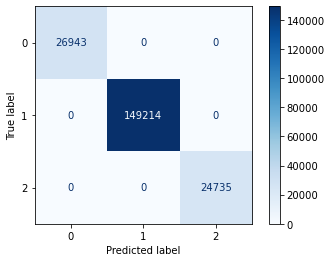

In [9]:
svm3=SVC(kernel='linear',C=1.0,gamma=228,coef0=1.0,verbose=True,random_state=np.random.RandomState())
svm3.fit(X_train,y_train)
y_pred=svm3.predict(X_test)
print('Accuracy = {0}'.format(accuracy_score(y_pred,y_test)))
plot_confusion_matrix(svm3,X_test,y_test,cmap=plt.cm.Blues)

Это довольно быстро посчиталось

In [ ]:
svm4=SVC(kernel='sigmoid',C=1.0,gamma=99,coef0=1.0,verbose=True,random_state=np.random.RandomState())
svm4.fit(X_train,y_train)
y_pred=svm4.predict(X_test)
print('Accuracy = {0}'.format(accuracy_score(y_pred,y_test)))
plot_confusion_matrix(svm4,X_test,y_test,cmap=plt.cm.Blues)

[LibSVM]

Работает долго...